Data Preprocessing¶
1. Detect Face and Crop from Image:


* step-1: Read Image and convert to RGB
* step-2: Apply haar cascade classifier
* step-3: Crop face using coordinates from cascade classifier
* step-4: save image in repective directory/folder

In [1]:
import numpy as np # numerical python
import pandas as pd
import cv2 # opencv
from glob import glob # glob use to extract path of file
import matplotlib.pyplot as plt # visualze and display
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 1.Get list of all images path

In [3]:
fpath = glob(r'./data/female/*.jpg') # this will return all images path in a list
mpath = glob(r'./data/male/*.jpg')

In [4]:
print('The number of images in Female folder = ',len(fpath))
print('The number of images in Male folder = ',len(mpath))

The number of images in Female folder =  4762
The number of images in Male folder =  5399


#### Steps to Perform the Preprocessing 
1. Read Image and Convert to RGB 
2. Apply Haar Cascade Classifier 
3. Crop Face  
4. Save Image 

#### 2.Understand the 4 steps

In [5]:
### Step -1 Read Image and Convert to RGB
img = cv2.imread(fpath[0]) # read image in BGR
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # this step will convert image from BGR to RGB

[[ 86  86 273 273]]


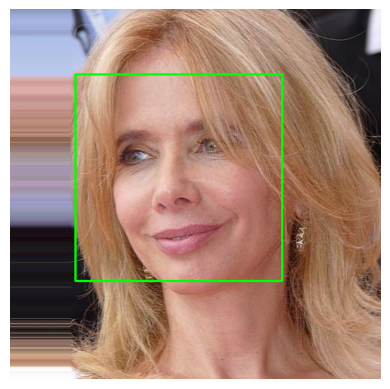

In [6]:
### Step -2: Apply Haar Cascade Classifier
haar = cv2.CascadeClassifier(r'./model/haarcascade_frontalface_default.xml') #loading the cacade classifier
gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY) # converting rgb image to gray


# detectMultiScale function is used to detect the faces. 
# This function will return a rectangle with coordinates(x,y,w,h) around the detected face.
#Parameters using -> 
# image→ input image in grayscale. Face detection works more efficiently in grayscale
# scaleFactor → This parameter specifies how much the image size is reduced at each image scale.
# minNeighbors → The detection algorithm finds multiple candidates
faces_list = haar.detectMultiScale(gray,1.5,5) # 
print(faces_list)
for x,y,w,h in faces_list:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2) #drawing the rectagle 
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

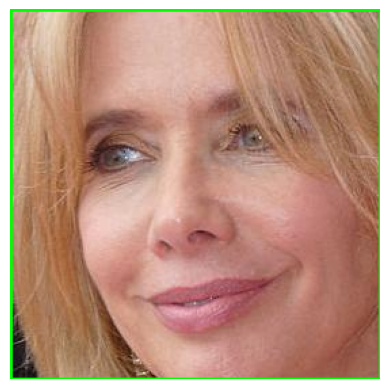

In [7]:
### Step -3: crop Face 
for x,y,w,h in faces_list:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2) 
    roi = img_rgb[y:y+h,x:x+w] #slicing the array getting only faces elements 
    plt.imshow(roi)
    plt.axis('off')
    plt.show()

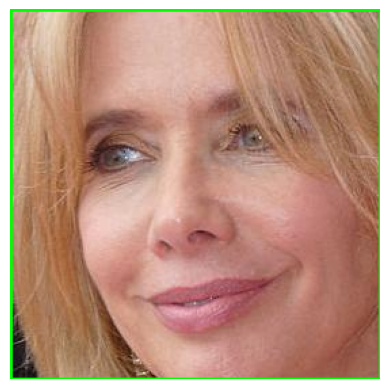

In [8]:
### Step -4: Save Image
plt.imshow(roi)
cv2.imwrite(f'./crop_data/female/female_{0}.jpg',roi) # this will save the crop image 
plt.axis('off')
plt.show()

### Croppping all images 

In [9]:
# cropping all female images 
for i in range(len(fpath)):
    # since we are performing this task on 5000 thousand images there is chance of error to avoid error we try and excet block 
    try: 
        img = cv2.imread(fpath[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        faces_list = haar.detectMultiScale(gray, 1.5, 5)
        for x, y, w, h in faces_list: 
            roi = img[y:y+h, x:x+w]

            cv2.imwrite(f'./crop_data/female/female_{i}.jpg',roi)
            # print('image successfully processed')
    except: 
        print('unable')

In [10]:
# Cropping all male images 
for i in range(len(mpath)):
    try:
    
        img = cv2.imread(mpath[i])
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        faces_list = haar.detectMultiScale(gray, 1.5, 5)
        for x,y,w,h in faces_list:
            roi = img[y:y+h, x:x+w]
            cv2.imwrite(f'./crop_data/male/male_{i}.jpg',roi)
    except:
        print("unable")

# Exploratory Data Analysis
for image resizing 
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [11]:
# extract path of male and female in crop_data folder and put them in a list
fpath = glob(r'./crop_data/female/*.jpg')
mpath = glob(r'./crop_data/male/*.jpg')

In [12]:
print('The number of images in Female folder = ',len(fpath))
print('The number of images in Male folder = ',len(mpath))

The number of images in Female folder =  5408
The number of images in Male folder =  4632


In [13]:
# creating a dataframe for female and male to to EDA
df_female = pd.DataFrame(fpath,columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath,columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male),axis=0)

df.head()

,filepath,gender
0,./crop_data/female\feamale_0.jpg,female
1,./crop_data/female\feamale_1.jpg,female
2,./crop_data/female\feamale_100.jpg,female
3,./crop_data/female\feamale_1002.jpg,female
4,./crop_data/female\feamale_1005.jpg,female


In [14]:
df.tail()

,filepath,gender
4627,./crop_data/male\male_994.jpg,male
4628,./crop_data/male\male_996.jpg,male
4629,./crop_data/male\male_997.jpg,male
4630,./crop_data/male\male_998.jpg,male
4631,./crop_data/male\male_999.jpg,male


In [15]:
df.shape

(10040, 2)

In [16]:
# it will take each image path
# then return width of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [17]:
df['dimension'] = df['filepath'].apply(get_size) # store dimension of image in this columns

In [18]:
df.head()

,filepath,gender,dimension
0,./crop_data/female\feamale_0.jpg,female,273
1,./crop_data/female\feamale_1.jpg,female,182
2,./crop_data/female\feamale_100.jpg,female,122
3,./crop_data/female\feamale_1002.jpg,female,122
4,./crop_data/female\feamale_1005.jpg,female,182


#### Exploratory Data Analysis
1. Distribution of Male and Female 
 - Bar Chart
 - Pie Chart
2. What Distribution of size of all Images
 - Histogram
 - Box Plot
 - Split by “Gender”
3. Make the decision of width & height to resize using above chart.
4. Remove the few images that are having very less size

In [19]:
dist_gender = df['gender'].value_counts()
type(dist_gender)

pandas.core.series.Series

<Axes: ylabel='count'>

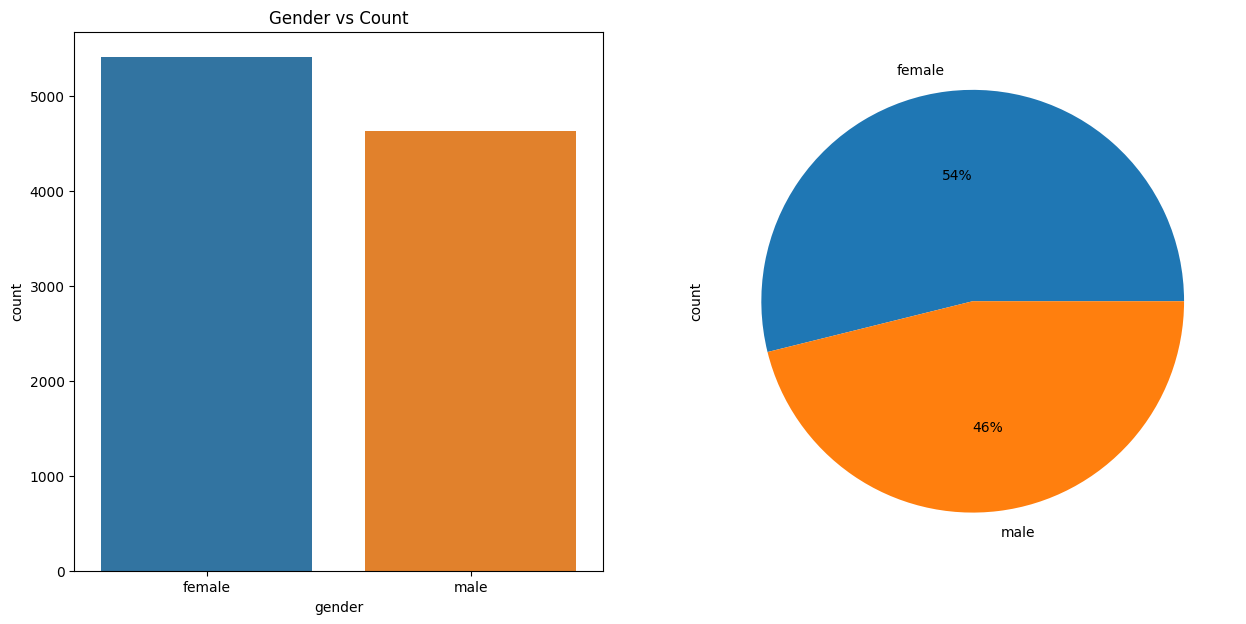

In [20]:

fig, ax = plt.subplots(1,2, figsize = (15,7))
sns.countplot(x = 'gender', data=df, hue='gender', legend=False, ax = ax[0]).set_title('Gender vs Count')
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')

<Axes: xlabel='dimension'>

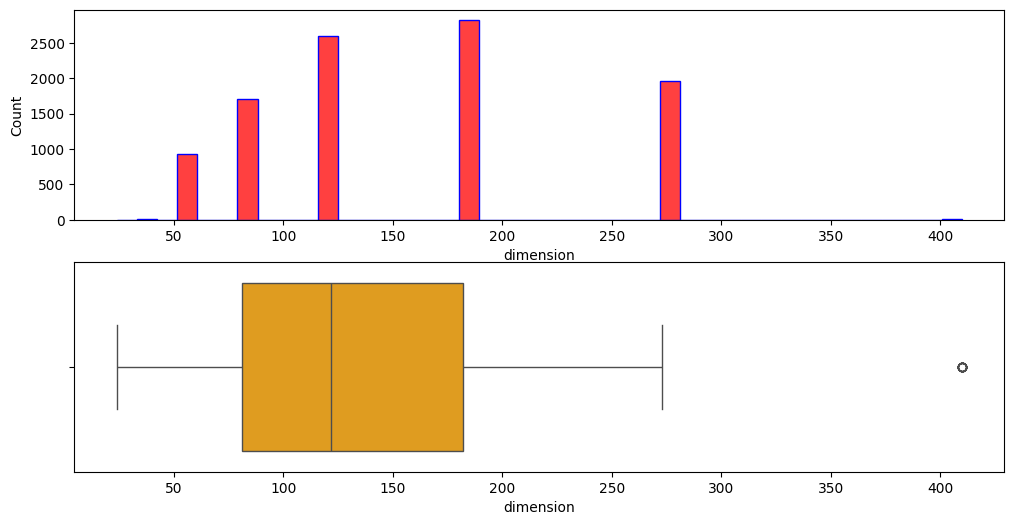

In [21]:
# What Distribution of size of all Images
# Histogram
# Box Plot
# Split by “Gender”
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
# sns.histplot(df['dimension'], hue='dimension')
sns.histplot(x = 'dimension', data=df, color='red', edgecolor='blue')

plt.subplot(2,1,2)
sns.boxplot(x = 'dimension', data=df, color='orange')

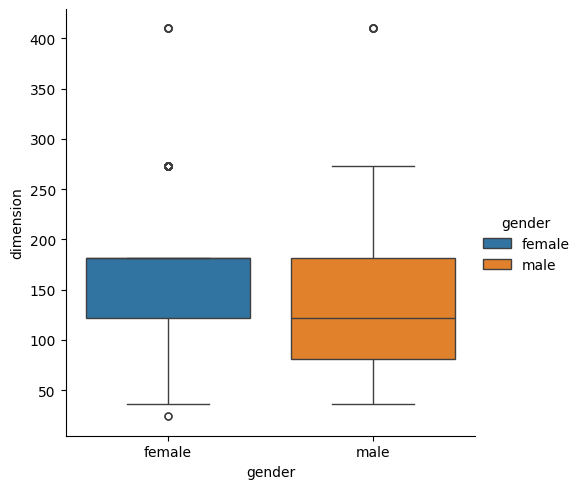

In [22]:
sns.catplot(data=df,x='gender',y='dimension',kind='box', hue='gender', legend=True)

1. We have almost equal distrbution of gender (numbers)
2. Most of the images are having dimension more than 60
3. Female most of the female images are HD compare to male images

---
- **Consider the image with dimensions more than 60**
- **Resize all the the image into 100 x 100*

In [23]:
df_filter = df[df['dimension']>60]
df_filter.shape

(9102, 3)

In [24]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.543177
male      0.456823
Name: proportion, dtype: float64

### Structure the Image 
* 100 x 100
steps to structure the Image \
- Step-1: Read Image 
- Step-2: Convert into grayscale
- Step-3: Resize into 100x100
- Step-4: Flatten Image(1x10000)

In [25]:
def structuring(path):
    try:

        # step - 1: read image
        img = cv2.imread(path) # BGR
        # step - 2: convert into grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
        # step -3: resize into 100 x 100 array   
        size = gray.shape[0]
        if size >= 100:
            gray_resize = cv2.resize(gray,(100,100))
        
            # step -4: Flatten Image (1x10,000)
            flatten_image = gray_resize.flatten()
            return flatten_image
    
    except:
        return None

In [26]:
df_filter['data'] = df_filter['filepath'].apply(structuring) # convert all images to into 100 x 100

In [27]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female\feamale_0.jpg,female,273,"[188, 182, 182, 185, 174, 181, 192, 180, 217, ..."
1,./crop_data/female\feamale_1.jpg,female,182,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,./crop_data/female\feamale_100.jpg,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./crop_data/female\feamale_1002.jpg,female,122,"[132, 121, 118, 97, 85, 92, 91, 110, 155, 162,..."
4,./crop_data/female\feamale_1005.jpg,female,182,"[234, 234, 234, 228, 231, 205, 122, 98, 74, 54..."


In [28]:
data = df_filter['data'].apply(pd.Series) #this will convert list element into seprate column

In [29]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188.0,182.0,182.0,185.0,174.0,181.0,192.0,180.0,217.0,218.0,...,109.0,111.0,115.0,116.0,122.0,116.0,120.0,119.0,117.0,110.0
1,32.0,23.0,31.0,27.0,28.0,30.0,28.0,33.0,36.0,30.0,...,58.0,47.0,27.0,34.0,22.0,27.0,23.0,37.0,63.0,18.0
2,49.0,49.0,35.0,34.0,42.0,40.0,35.0,39.0,71.0,62.0,...,210.0,230.0,231.0,237.0,238.0,230.0,220.0,212.0,210.0,208.0
3,132.0,121.0,118.0,97.0,85.0,92.0,91.0,110.0,155.0,162.0,...,161.0,111.0,62.0,62.0,66.0,81.0,90.0,100.0,108.0,113.0
4,234.0,234.0,234.0,228.0,231.0,205.0,122.0,98.0,74.0,54.0,...,243.0,243.0,237.0,237.0,239.0,237.0,236.0,241.0,238.0,240.0


In [30]:
data.columns = [f'pixel_{i}' for i in data.columns] #just renaming the column 

In [31]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,188.0,182.0,182.0,185.0,174.0,181.0,192.0,180.0,217.0,218.0,...,109.0,111.0,115.0,116.0,122.0,116.0,120.0,119.0,117.0,110.0
1,32.0,23.0,31.0,27.0,28.0,30.0,28.0,33.0,36.0,30.0,...,58.0,47.0,27.0,34.0,22.0,27.0,23.0,37.0,63.0,18.0
2,49.0,49.0,35.0,34.0,42.0,40.0,35.0,39.0,71.0,62.0,...,210.0,230.0,231.0,237.0,238.0,230.0,220.0,212.0,210.0,208.0
3,132.0,121.0,118.0,97.0,85.0,92.0,91.0,110.0,155.0,162.0,...,161.0,111.0,62.0,62.0,66.0,81.0,90.0,100.0,108.0,113.0
4,234.0,234.0,234.0,228.0,231.0,205.0,122.0,98.0,74.0,54.0,...,243.0,243.0,237.0,237.0,239.0,237.0,236.0,241.0,238.0,240.0


#### Data Normalization

In [32]:
data = data/255.0

In [33]:
data['gender'] = df_filter['gender']

In [34]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.737255,0.713725,0.713725,0.725490,0.682353,0.709804,0.752941,0.705882,0.850980,0.854902,...,0.435294,0.450980,0.454902,0.478431,0.454902,0.470588,0.466667,0.458824,0.431373,female
1,0.125490,0.090196,0.121569,0.105882,0.109804,0.117647,0.109804,0.129412,0.141176,0.117647,...,0.184314,0.105882,0.133333,0.086275,0.105882,0.090196,0.145098,0.247059,0.070588,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.517647,0.474510,0.462745,0.380392,0.333333,0.360784,0.356863,0.431373,0.607843,0.635294,...,0.435294,0.243137,0.243137,0.258824,0.317647,0.352941,0.392157,0.423529,0.443137,female
4,0.917647,0.917647,0.917647,0.894118,0.905882,0.803922,0.478431,0.384314,0.290196,0.211765,...,0.952941,0.929412,0.929412,0.937255,0.929412,0.925490,0.945098,0.933333,0.941176,female


#### Handling Missing Values 

In [35]:
data.isnull().sum()

pixel_0       1701
pixel_1       1701
pixel_2       1701
pixel_3       1701
pixel_4       1701
              ... 
pixel_9996    1701
pixel_9997    1701
pixel_9998    1701
pixel_9999    1701
gender           0
Length: 10001, dtype: int64

In [36]:
data.dropna(inplace=True)

In [37]:
data.shape

(7401, 10001)

## Saving the data 


In [39]:
import pickle

In [45]:
with open('data.pickle', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(data, file) 